### **Job Attrition Predictor**
The dataset was done in Python. This aims to predict whether an employee at a certain company (Biotech) would leave given various characteristics/features like income, age, work environment and so on. 

I will try to optimize the successful prediction rates using Machine Learning and Logistic Regression.  

First, I imported all of my libraries like so:

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns



Then I read it from MS Excel. 

In [2]:
data = pd.read_excel("Dataset_-_Summit_Biotech_Attrition_2021.xlsx","Attrition Dataset")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,1,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,1,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,1,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


I decided to convert some of the text data into one-hot numerical data. For example, if someone is not Divorced or Married, he or she is single (usually). So, we will have one-hot binary codes for just Single and Married. If Single is 1, the person is single, if married is 1, the person is married, while if single and married are 0, the person is divorced. This is done using dummies.


After that, I decided to clean the data and remove the data that would not have a huge effect on the model. 

In [3]:
encoded_data = pd.get_dummies(data,drop_first=True)
encoded_data = encoded_data.drop(['EmployeeNumber'],axis =1)
encoded_data = encoded_data.drop(['EmployeeCount'],axis =1)
encoded_data.head()


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,3,2,4,6592.3,8,11,3,...,0,0,0,0,0,1,0,0,1,1
1,49,8,3,2,2,2,5643.0,1,23,4,...,0,0,0,0,1,0,0,1,0,0
2,37,2,4,2,1,3,2299.0,6,15,3,...,1,0,0,0,0,0,0,0,1,1
3,33,3,4,3,1,3,3199.9,1,11,3,...,0,0,0,0,1,0,0,1,0,1
4,27,2,1,3,1,2,3814.8,9,12,3,...,1,0,0,0,0,0,0,1,0,0


After this, the test and training inputs and ouputs are separated into different variables. 

In [4]:
#Test train split
X_train, X_test, Y_train, Y_test = train_test_split(encoded_data.drop('Attrition_Yes',axis =1),encoded_data['Attrition_Yes'],test_size=0.2)


Also, it is important to note that for the first model I created, I decided to use all of the variables. I hope to reduce them as I try to find the most elite model. I set the maximum number of iterations to 10,000. (not really ideal). 
Due to the large amount of features, I was thinking of neural networks to solve this problem, but I will first wait for the result. 

In [5]:
#train the model using the training data
LogReg = LogisticRegression(solver='lbfgs',max_iter=4000)
LogReg.fit(X_train,Y_train)


LogisticRegression(max_iter=4000)

In [6]:
result = 100* LogReg.score(X_test,Y_test)
print("The percentage of success of this model currently stands as",result,"%")


The percentage of success of this model currently stands as 88.09523809523809 %


So, it turns out we have an about (80-90%) accuracy when we perform logistic regression on all the data. That is a good percentage. However, I want to increase it to high nineties in percentage. 



Actually, I realized that I used only one sort of grid search parameters. I want to see if I can obtain a more accurate model hypertuning the parameters. 



First, let me create a logistic regression function for convenience. 

In [7]:
def getaccuracy(encoded_data):
    X_train, X_test, Y_train, Y_test = train_test_split(encoded_data.drop('Attrition_Yes',axis =1),encoded_data['Attrition_Yes'])
    LogReg = LogisticRegression(solver= 'saga',max_iter =10000)
    LogReg.fit(X_train,Y_train)
    acc =100*LogReg.score(X_test,Y_test)
    return acc

After this, I found the predicted values of y as follows:

In [8]:
Y_pred = LogReg.predict(X_test)
print(Y_pred)
print(Y_test)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
1464    0
817     0
694     0
837     0
751     0
       ..
1434    0
1112    1
1100    0
1015    0
425     0
Name: Attrition_Yes, Length: 294, dtype: uint8


After this, I decided to design the confusion matrix also as well as other variables.

[[241   4]
 [ 31  18]]


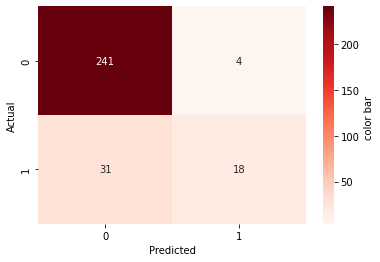

In [9]:
c_m = confusion_matrix(Y_test,Y_pred) #c_m stands for confusion matrix
print(c_m)
sns.heatmap(c_m,cmap = "Reds",annot = True,cbar_kws={"orientation":"vertical","label":"color bar "},xticklabels=[0,1],yticklabels=[0,1],fmt ='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Here, I will confirm the accuracy of the model (although this was already done beforehand), as well as the precision, recall and f1 scores. 


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [11]:
print("The accuracy score is",100*accuracy_score(Y_test,Y_pred),"%. It is the same as the one calculated above.")
print("The precision score is",100*precision_score(Y_test,Y_pred,average='weighted',labels=np.unique(Y_pred)),"%")
print("The recall score is",100*recall_score(Y_test,Y_pred,average='weighted',labels=np.unique(Y_pred)),"%")
print("The f1 score is",100*f1_score(Y_test,Y_pred,average='weighted',labels=np.unique(Y_pred)),"%")


The accuracy score is 88.09523809523809 %. It is the same as the one calculated above.
The precision score is 87.47214795008912 %
The recall score is 88.09523809523809 %
The f1 score is 86.14251595971703 %


The accuracy, precision, recall and f1 scores are very high, so I believe I can predict something. 

Suppose someone called John Bull (a male) is 47 years old, works frequently as a travel researcher, lives 69 km away from home, studied in the Medical field, is fully satisfied in the working environment but is relatively slack on the job. He works on a higher level(4) job in the Research department, and is satisfied with the job. He divorced his husband last month. He earns $21000 monthly. However, he traverses from one company to the other, having worked at 11 companies. He's a research director.
He doesn't do overtime, his percent salary hike is 13%, and his performance rating is a measly 2 out of 4. His relationship satisfaction is really great, although he doesn't have stock option. He's worked 13 years, trained about 9 times last year and he has an exceptional work-life balance. He's been at the company for only a year and at the same position for the same amount of time. Consequently, no year since last promotion and he has spent 1 year with the current manager. How likely is he to quit the job? 


To do this, I will set it up in the encoded data format:

In [12]:
pd.set_option('display.max_columns', None)
encoded_data.head()


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Gender_Prefer to self-describ,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,3,2,4,6592.3,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,8,3,2,2,2,5643.0,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,2,4,2,1,3,2299.0,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,33,3,4,3,1,3,3199.9,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,2,1,3,1,2,3814.8,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [13]:
LogReg.fit(X_train.values,Y_train)
#This is the input for the model using this data
LogReg.predict(np.array([[47,69,4,2,4,4,21000,11,13,2,4,0,13,9,4,1,1,0,1,1,0,1,0 ,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0]]))[0]


0

As a result of this model, it is clear that John Bull would not leave his job next year given the variables we have here. 

A machine learning model is best deployed with data. However, since I do not have data, I decided to randomly generate data on Ms. Excel and simulate the data using the ML model I just generated.

In [14]:
random_data = pd.read_excel("Datathon_Machine_Learning_Book.xlsx")
random_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,45,Non-travel,Research & Development,21,Medical,1,1,3,Prefer to self-describe,1,5,Sales Executive,4,Married,13467.2,7,N,No,24,2,2,0,22,1,3,1,1,13,1
1,59,Travel_Rarely,Human Resources,9,Other,1,2,1,Non-binary,2,4,Manufacturing Director,4,Divorced,3607.4,10,Y,No,21,1,1,0,0,3,2,0,0,0,0
2,47,Travel_Rarely,Sales,20,Technical Degree,1,3,4,Prefer not to say,3,1,Manager,3,Married,10928.2,6,N,Yes,22,2,2,2,17,6,2,5,5,12,5
3,28,Non-travel,Sales,8,Other,1,4,1,Prefer to self-describe,4,5,Research Director,3,Divorced,23726.0,2,Y,No,10,3,4,1,25,4,3,5,5,7,5
4,58,Travel_Rarely,Research & Development,23,Other,1,5,3,Prefer to self-describe,1,5,Sales Representative,2,Divorced,9965.3,6,Y,Yes,15,2,3,0,20,1,1,8,8,15,8


In [15]:
randomly_encoded_data = pd.get_dummies(random_data,drop_first=True)
randomly_encoded_data = randomly_encoded_data.drop(['EmployeeNumber'],axis =1)
randomly_encoded_data = randomly_encoded_data.drop(['EmployeeCount'],axis =1)
randomly_encoded_data.head()


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Gender_Prefer to self-describe,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_Yes
0,45,21,3,1,5,4,13467.2,7,24,2,2,0,22,1,3,1,1,13,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,59,9,1,2,4,4,3607.4,10,21,1,1,0,0,3,2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,47,20,4,3,1,3,10928.2,6,22,2,2,2,17,6,2,5,5,12,5,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3,28,8,1,4,5,3,23726.0,2,10,3,4,1,25,4,3,5,5,7,5,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,58,23,3,1,5,2,9965.3,6,15,2,3,0,20,1,1,8,8,15,8,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1


In [16]:
LogReg.predict(randomly_encoded_data.values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1], dtype=uint8)

So, I have been able to predict using the machine learning model who will leave and who will not leave given the available data.

## Conclusion ##
I have been able to create a fairly accurate model that predicts with about 80 - 90% accuracy whether an employee would leave a job or not. 
It is important to note that I obtained the training and test datasets from Biotech. 
If you see this machine learning model, and you believe there are ways it can be improved, you can email oreade1608@gmail.com. I would be happy to listen to your advice. 
Thanks. 
